In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [69]:
# df = pd.read_csv("Juego_2024_25/merged_clay.csv") 

df = pd.read_csv("Juego_2024_25/merged_hard.csv") 



SERVICIO

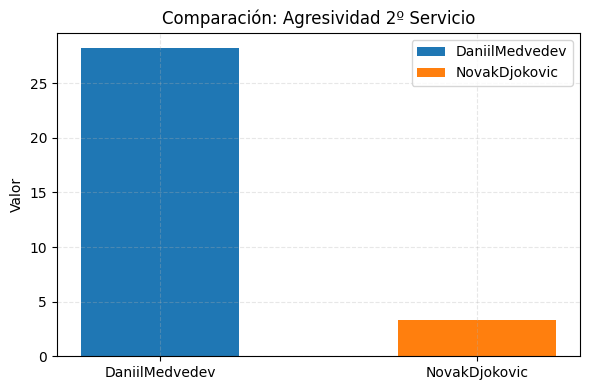

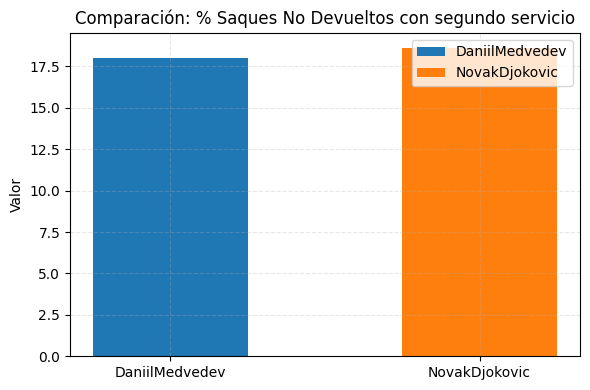

In [70]:
# === Filtrar jugadores ===
jugadores = ['DaniilMedvedev', 'NovakDjokovic']
df_sel = df[df['Player'].isin(jugadores)].set_index('Player')

# === Variables a comparar ===
variables = ['2ndAgg', '2nd: Unret%']
labels_mostrar = ['Agresividad 2º Servicio', '% Saques No Devueltos con segundo servicio']

# === Crear una gráfica por variable ===
for i, (var, label) in enumerate(zip(variables, labels_mostrar)):
    x = np.arange(len(jugadores))
    width = 0.5

    fig, ax = plt.subplots(figsize=(6, 4))

    for j, jugador in enumerate(jugadores):
        valor = df_sel.loc[jugador, var]
        ax.bar(j, valor, width, label=jugador)

    ax.set_xticks(x)
    ax.set_xticklabels(jugadores)
    ax.set_ylabel("Valor")
    ax.set_title(f"Comparación: {label}")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()


Hay que incluirlo, tener en cuenta que djokovic no se juega tantos segundos pero tiene mejor rendimiento, nada de pesos para esta

NO SE SI AÑADIR LA DE <=3 JUEGOS

RESTO

RALLY

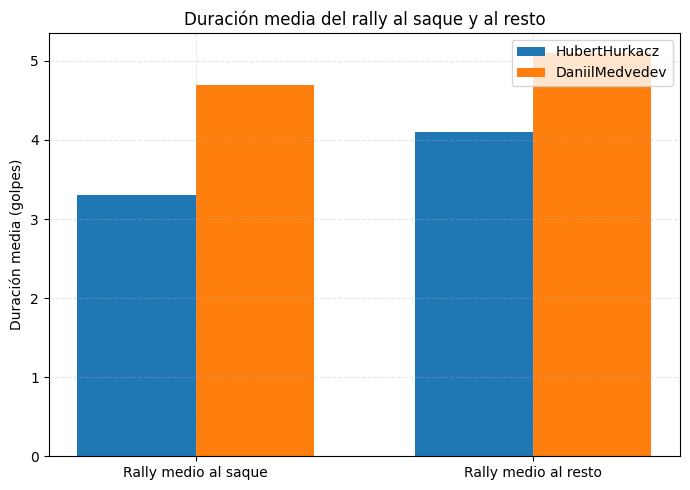

In [71]:
# === Filtrar jugadores ===
jugadores = ['HubertHurkacz', 'DaniilMedvedev']
df_sel = df[df['Player'].isin(jugadores)].set_index('Player')

# === Variables a graficar ===
variables = ['RLen-Serve', 'RLen-Return']
labels_mostrar = ['Rally medio al saque', 'Rally medio al resto']

# === Posiciones y configuración ===
x = np.arange(len(variables))
width = 0.35

fig, ax = plt.subplots(figsize=(7, 5))

# Dibujar barras para cada jugador
for i, jugador in enumerate(jugadores):
    valores = df_sel.loc[jugador, variables].values
    ax.bar(x + i * width - width / 2, valores, width, label=jugador)

# Estética
ax.set_xticks(x)
ax.set_xticklabels(labels_mostrar)
ax.set_ylabel("Duración media (golpes)")
ax.set_title("Duración media del rally al saque y al resto")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

Son sacadores, no tiene tanto valor, lo que duran si no, que ocurre en rally largos

si es sacador contra restador tiene que tener mas peso para luego decir puntos fuertes y debiles

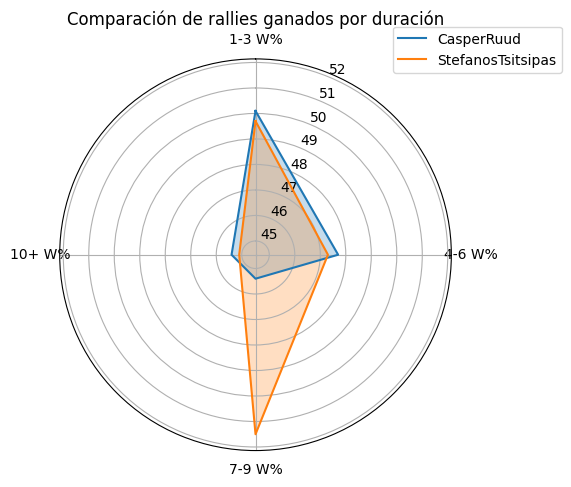

In [72]:


# === 2. Seleccionar a los dos jugadores ===
jugadores = ['CasperRuud', 'StefanosTsitsipas']
df_filtrado = df[df['Player'].isin(jugadores)].copy()

# === 3. Variables de duración de rally ===
labels = ['1-3 W%', '4-6 W%', '7-9 W%', '10+ W%']

# Asegurar que las columnas existen (puedes revisar y ajustar los nombres exactos si hace falta)
if not all(label in df.columns for label in labels):
    raise ValueError("Alguna de las columnas no se encuentra en el CSV. Revisa los nombres exactos.")

# === 4. Crear ángulos para el radar chart ===
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # cerrar el polígono

# === 5. Crear figura radar ===
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

def add_player(ax, row, label):
    values = [row[var] for var in labels]
    values += values[:1]
    ax.plot(angles, values, label=label)
    ax.fill(angles, values, alpha=0.25)

# Añadir cada jugador
for _, row in df_filtrado.iterrows():
    add_player(ax, row, row['Player'])

valores_min = df_filtrado[labels].min().min()
valores_max = df_filtrado[labels].max().max()

# Ajustar márgenes para dar un poco de aire visual
margen = (valores_max - valores_min) * 0.1  # 10% de margen

# === 6. Configurar gráfico ===
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title("Comparación de rallies ganados por duración")
ax.set_ylim(valores_min - margen, valores_max + margen)  
# ax.set_yticklabels([])  # Elimina las etiquetas del eje radial

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()


dos buenos sacadores, no dar peso
dos buenso restadores dar peso para puntos fuertes y debiles

Se enfrentan jugadores de fondo
Ej: Djokovic, Alcaraz, Medvedev, Ruud, Tsitsipas, Zverev
Porque:

Este gráfico revela si alguien tiene ventaja táctica o física en puntos largos.


TACTICA

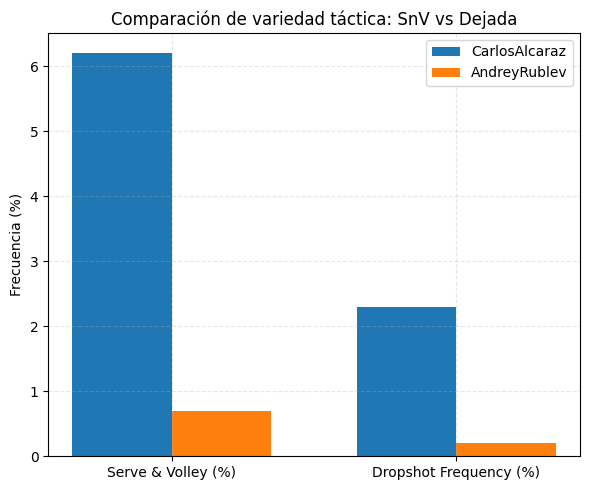

In [53]:
# === Seleccionar jugadores y estadísticas ===
jugadores = ['CarlosAlcaraz', 'AndreyRublev']
metricas = ['SnV Freq', 'Drop: Freq']

# Filtrar datos
df_sel = df[df['Player'].isin(jugadores)].set_index('Player')

x = np.arange(len(metricas))
width = 0.35

fig, ax = plt.subplots(figsize=(6, 5))

val1 = df_sel.loc[jugadores[0], metricas]
val2 = df_sel.loc[jugadores[1], metricas]

# Dibujar barras
ax.bar(x - width/2, val1, width, label=jugadores[0])
ax.bar(x + width/2, val2, width, label=jugadores[1])

# Etiquetas
ax.set_xticks(x)
ax.set_xticklabels(['Serve & Volley (%)', 'Dropshot Frequency (%)'])
ax.set_ylabel("Frecuencia (%)")
ax.set_title("Comparación de variedad táctica: SnV vs Dejada")
ax.legend(loc='upper right')
ax.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

Hay que estar mas atento y mas cerca de pista para las dejadas y mas precisio con el primer resto, que sea profundo

no pesos para esta, pero si para puntos debiles y fuertes

KEY GAME Y KEY POINT

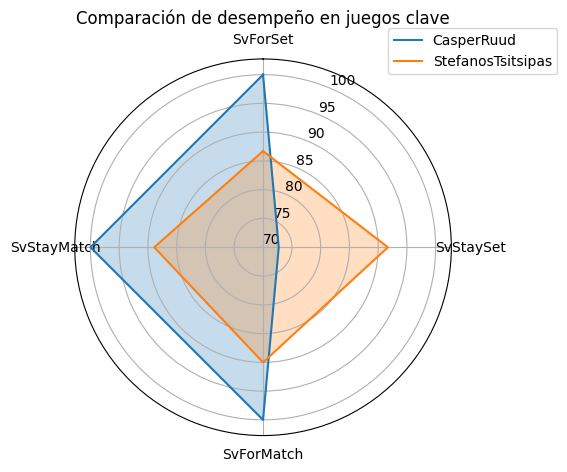

In [54]:


# === 2. Seleccionar a los dos jugadores ===
jugadores = ['CasperRuud', 'StefanosTsitsipas']
df_filtrado = df[df['Player'].isin(jugadores)].copy()

# === 3. Variables de duración de rally ===
labels = ['SvForSet', 'SvStaySet', 'SvForMatch', 'SvStayMatch']

# Asegurar que las columnas existen (puedes revisar y ajustar los nombres exactos si hace falta)
if not all(label in df.columns for label in labels):
    raise ValueError("Alguna de las columnas no se encuentra en el CSV. Revisa los nombres exactos.")

# === 4. Crear ángulos para el radar chart ===
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # cerrar el polígono

# === 5. Crear figura radar ===
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

def add_player(ax, row, label):
    values = [row[var] for var in labels]
    values += values[:1]
    ax.plot(angles, values, label=label)
    ax.fill(angles, values, alpha=0.25)

# Añadir cada jugador
for _, row in df_filtrado.iterrows():
    add_player(ax, row, row['Player'])

valores_min = df_filtrado[labels].min().min()
valores_max = df_filtrado[labels].max().max()

# Ajustar márgenes para dar un poco de aire visual
margen = (valores_max - valores_min) * 0.1  # 10% de margen

# === 6. Configurar gráfico ===
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title("Comparación de desempeño en juegos clave")
ax.set_ylim(valores_min - margen, valores_max + margen)  
# ax.set_yticklabels([])  # Elimina las etiquetas del eje radial

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()


PESO SEGUN perfil general de break y tb util si es para consol o breakback

siempre peso importante, ver desempeño en perfil general y ver quien tiene ventaja

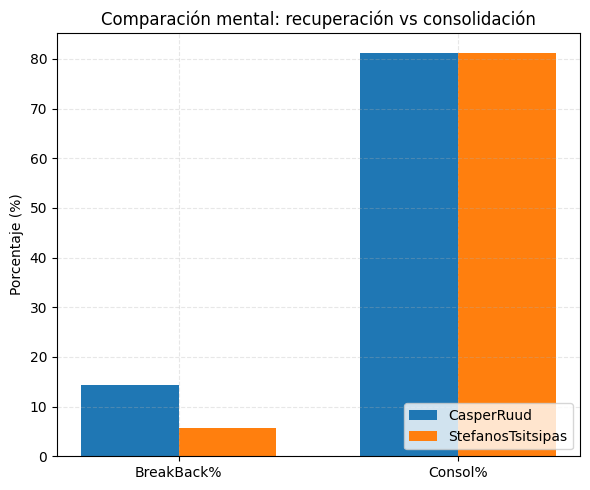

In [55]:
metricas = ['BreakBack%', 'Consol%']

# Filtrar y preparar datos
df_sel = df[df['Player'].isin(jugadores)].set_index('Player')

x = np.arange(len(metricas))
width = 0.35

fig, ax = plt.subplots(figsize=(6, 5))

val1 = df_sel.loc[jugadores[0], metricas]
val2 = df_sel.loc[jugadores[1], metricas]

# Dibujar barras
ax.bar(x - width/2, val1, width, label=jugadores[0])
ax.bar(x + width/2, val2, width, label=jugadores[1])

# Etiquetas y estilo
ax.set_xticks(x)
ax.set_xticklabels(['BreakBack%', 'Consol%'])
ax.set_ylabel("Porcentaje (%)")
ax.set_title("Comparación mental: recuperación vs consolidación")
ax.legend(loc='lower right')
ax.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

TSISSIPAS:
buen sacador
normal restador
no consigue muchas oportunidades de break ni las aprovecha (resto breakback)
se enfrentan a bastantes pero los salvan (saque consol)

RUUD:
buen sacador
normal restador
no consigue muchas oportunidades de break ni las aprovecha (resto breakback)
se enfrentan a pocos y no los salvan  (saque consol)



estaas estadisticas sirven para luego sumar o restar en la prediccion final
peso: ni ideaç
si es un buen restador y tiene alto breakback:
    Esta gráfica refuerza su perfil como un amenaza constante, incluso cuando pierde el saque.

    Es útil para identificar rivales que no se pueden relajar nunca, porque están listos para romper de nuevo.

si es un no tan buen restador y tiene alto breakback:
    Técnicamente no es el mejor restador, pero mentalmente muy reactivo: se crece en momentos importantes.

si es un no tan buen restador y bajo breakback : menos valor

si es un buen restador y tiene bajo breakback:
    no rinde bajo presión.

    Puede ser un signo de debilidad mental o falta de enfoque tras perder el saque.

¡¡¡¡¡¡¡¡¡Gráfica muy útil para descubrir debilidades ocultas en jugadores top.

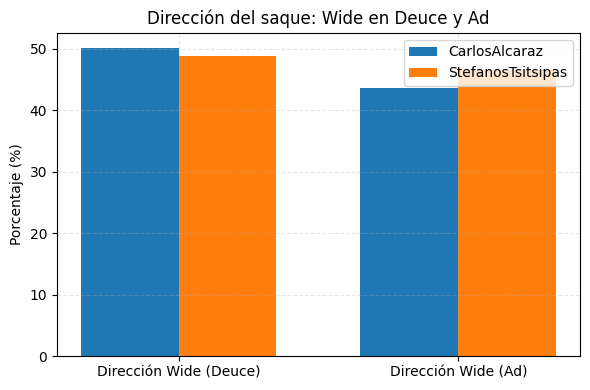

In [56]:
# === Filtrar jugadores ===
jugadores = ['CarlosAlcaraz', 'StefanosTsitsipas']
df_sel = df[df['Player'].isin(jugadores)].set_index('Player')

# === Variables a mostrar ===
variables = ['D Wide%', 'A Wide%']
labels = ['Dirección Wide (Deuce)', 'Dirección Wide (Ad)']

# === Preparar gráfico ===
x = np.arange(len(variables))
width = 0.35

fig, ax = plt.subplots(figsize=(6, 4))

for i, jugador in enumerate(jugadores):
    valores = df_sel.loc[jugador, variables].values
    ax.bar(x + i * width - width / 2, valores, width, label=jugador)

# === Estética ===
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0)
ax.set_ylabel("Porcentaje (%)")
ax.set_title("Dirección del saque: Wide en Deuce y Ad")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

IMPORTANTE PARA VER SI PREFIERE MUCHO MAS UN LADO, NORMALMENTE EN SITUACIONES COMPLICADAS, PREFERIRA SACAR A ESE LADO

WINNER Y ERROR NO FORZADO

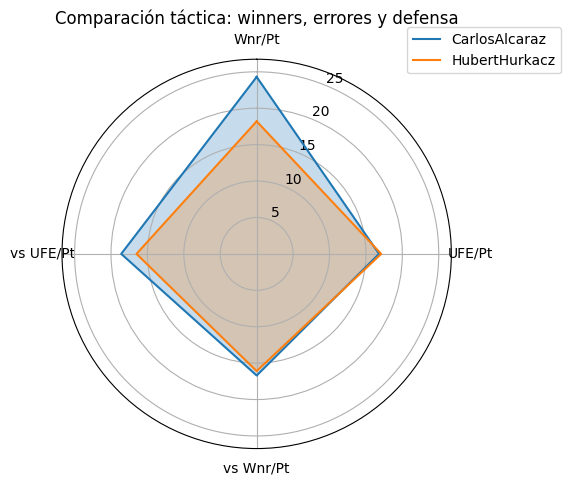

In [58]:
# === Seleccionar jugadores ===
jugadores = ['CarlosAlcaraz', 'HubertHurkacz']
df_filtrado = df[df['Player'].isin(jugadores)].copy()

# === Variables a comparar ===
labels = ['Wnr/Pt', 'UFE/Pt', 'vs Wnr/Pt', 'vs UFE/Pt']

# Verificar que las columnas existen
if not all(col in df.columns for col in labels):
    raise ValueError("Falta alguna columna en el CSV.")

# === Ángulos del radar ===
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # cerrar el círculo

# === Inicializar radar ===
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Función para añadir cada jugador
def add_player(ax, row, label):
    values = [row[var] for var in labels]
    values += values[:1]
    ax.plot(angles, values, label=label)
    ax.fill(angles, values, alpha=0.25)

# Añadir ambos jugadores
for _, row in df_filtrado.iterrows():
    add_player(ax, row, row['Player'])

# === Configurar gráfico ===
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title("Comparación táctica: winners, errores y defensa")
ax.set_ylim(0, max(df_filtrado[labels].max()) * 1.1)  # ajuste dinámico
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

Si alcaraz hace mas winner/pt y a tsisipas le promedian mas wnr/pt de los que hace, esto se acentuara en el partido

VER SI DE VERDAD TIENE VALOR

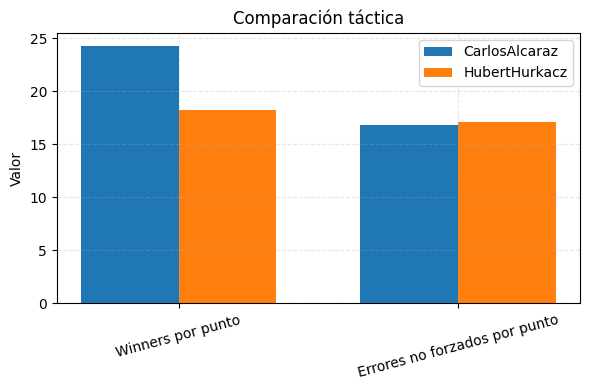

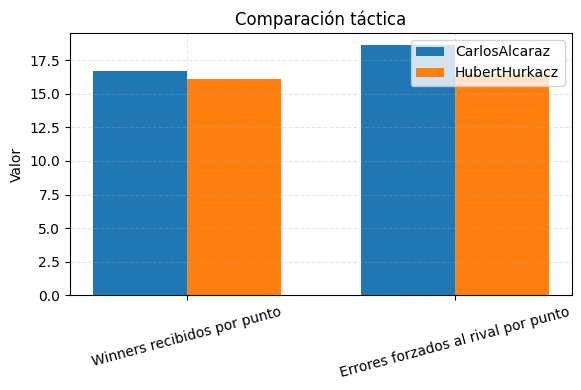

In [59]:
# === Seleccionar jugadores ===
jugadores = ['CarlosAlcaraz', 'HubertHurkacz']
df_filtrado = df[df['Player'].isin(jugadores)].set_index('Player')

# === Agrupación de variables ===
grupos = [
    (['Wnr/Pt', 'UFE/Pt'], ['Winners por punto', 'Errores no forzados por punto']),
    (['vs Wnr/Pt', 'vs UFE/Pt'], ['Winners recibidos por punto', 'Errores forzados al rival por punto'])
]

width = 0.35

# === Generar una gráfica por grupo ===
for vars_, labels in grupos:
    x = np.arange(len(vars_))
    fig, ax = plt.subplots(figsize=(6, 4))
    
    for i, jugador in enumerate(jugadores):
        valores = df_filtrado.loc[jugador, vars_].values
        ax.bar(x + i * width - width / 2, valores, width, label=jugador)

    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=15)
    ax.set_ylabel("Valor")
    ax.set_title("Comparación táctica")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

creo que se entienden mejor las graficas:

cometen los mismos erroes no forzados pero alcaraz provoca mas

nada de pesos aqui creo
